# Bangla Fake News Detection Project

This project detects fake vs. real news in Bangla using Machine Learning (ML) models.
We apply preprocessing, text vectorization, model training (Naive Bayes, Bernoulli NB, Logistic Regression), and performance evaluation using accuracy, confusion matrix, ROC curves, and classification reports.**

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from wordcloud import WordCloud
from nltk.corpus import stopwords
import plotly.express as px
import string, warnings
warnings.filterwarnings("ignore")

# **Load and Explore Dataset**

In [2]:
# Load CSVs
real = pd.read_csv("/content/LabeledAuthentic-7K.csv", encoding="utf-8")
fake = pd.read_csv("/content/LabeledFake-1K.csv", encoding="utf-8")

print(real.shape, fake.shape)
print(real.columns, fake.columns)

(7202, 9) (1299, 10)
Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label'],
      dtype='object') Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'F-type'],
      dtype='object')


# **Data Preprocessing**

In [3]:
print(real.info())
print(fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7202 entries, 0 to 7201
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   articleID  7202 non-null   int64  
 1   domain     7202 non-null   object 
 2   date       7202 non-null   object 
 3   category   7202 non-null   object 
 4   source     7202 non-null   object 
 5   relation   7202 non-null   object 
 6   headline   7202 non-null   object 
 7   content    7202 non-null   object 
 8   label      7202 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 506.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   articleID  1299 non-null   int64 
 1   domain     1299 non-null   object
 2   date       1299 non-null   object
 3   category   1299 non-null   object
 4   source     1299 non-null   object
 5   

In [4]:
print("Real News:\n")
real['content'][0]



Real News:



'ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়েক বছরে তাদের পারফরম্যান্স নজর কেড়েছে ক্রিকেট জগতের। এশিয়া কাপের ১৪তম আসরেও দারুণ ছন্দে আছে আফগান ক্রিকেটাররা। পাঁচবারের এশিয়া কাপ চ্যাম্পিয়ন শ্রীলঙ্কাকে হারিয়ে এরই মধ্যে সেরা চারে পৌঁছে গেছে তারা। তবে দলের এমন ভালো সময়ে হঠাৎ করেই পদত্যাগ করেন আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান আতিফ মাশাল। তবে হঠাৎ কী কারণে তার এই পদত্যাগ- এ নিয়ে ওঠা প্রশ্নের জবাব দিয়েছেন আতিফ। তিনি জানান, সরকারের অন্য একটি বিশেষ পদে তাকে নিয়োগ দেওয়ার কারণেই বোর্ডের দায়িত্ব থেকে অব্যাহতি। তার পরিবর্তে এসিবির দায়িত্ব নেবেন আফগান বোর্ডের সাবেক সহ সভাপতি আজিজ উল্লাহ ফজলে।\xa0\xa0 ২০১৭ সালের জানুয়ারিতে পাঁচ বছরের জন্য আতিফকে বোর্ড প্রধান নির্বাচন করা হলেও দায়িত্বের আড়াই বছরের মাথায় দায়িত্ব থেকে অব্যাহতি দিলেন তিনি। বিডি প্রতিদিন/ ওয়াসিফ'

In [5]:
print("Fake News:\n")
fake['content'][5]

Fake News:



'বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল্পনার অবসান ঘটিয়ে অবশেষে বিয়ের পিড়িতে বসতে যাচ্ছেন পশ্চিমের জনপ্রিয় অভিনেত্রী মিয়া খলিফা ! দীর্ঘদিন যাব\u200dৎ ফেসবুকে রিফাত হোসেন নামে এক বাংলাদেশী তরুণের সাথে চুটিয়ে প্রেম করার পর অবশেষে বিয়ের সিদ্ধান্তের কথা জানালেন কিংবদন্তী এ তারকা। রিফাত হোসেন কুমিল্লার একটি বেসরকারী প্রতিষ্ঠানে অফিস সহকারী হিসেবে কর্মরত আছেন। (ভিডিওতে দেখুন মিয়া খলিফার সাক্ষাৎকার)জানা যায়,\xa0 পরিচয়টা হয়েছিলো অন্য একটি ওয়েবসাইটে। সেখানে মিয়া খলিফার একটি প্রামাণ্যচিত্র দেখে রিফাত ক্ষিপ্ত হন। এবং মিয়ার আম্মু আব্বুকে নিয়ে অকথ্য ভাষায় গালাগাল করেন। বিষয়টি মিয়া খলিফার নজরে আসলে তিনি রিফাতকে এসএমএস করে ক্ষিপ্ত হওয়ার কারণ জিজ্ঞেস করেন। কথোপকথনের সময় রিফাত মিয়া খলিফার ভূয়সী রুপের প্রশংসা করেন এবং তাকে আলোর পথে ফিরে আসার আহ্বান জানান। রিফাতের এ প্রস্তাবেই বদলে যায় মিয়া খলিফার জীবন। তারপর থেকেই মিয়া চলচ্চিত্রের\xa0রঙ্গীন পর্দায় অভিনয় বাদ দিয়ে নিজের সাদাকালো জীবনে ফিরে আসেন। গত দুবছরে সবকিছু থেকে দুরে সরে মিয়া খলিফা নিজেকে একটি সংসারী মানসিকতার মধ্

# **Handelling The Unnecessary Columns And Ensure the Label Type As Intiger**

In [6]:
# Ensure labels are int
real["label"] = real["label"].astype(int)
fake["label"] = fake["label"].astype(int)

# Drop extra columns (keep only headline, content, label)
real = real[["headline", "content", "label"]]
fake = fake[["headline", "content", "label"]]


# **Merge Two datasets**

In [7]:
# Merge into one dataframe
df = pd.concat([real, fake], axis=0).reset_index(drop=True)

# Combine headline + content
df["text"] = df["headline"].fillna("") + " " + df["content"].fillna("")
df = df[["text", "label"]]

print(df.shape)
print(df["label"].value_counts())
print(df.sample(5))

(8501, 2)
label
1    7202
0    1299
Name: count, dtype: int64
                                                   text  label
6916  লামায় বজ্রাঘা‌তে শিশু নিহত, আহত ২ বান্দরবানের ...      1
562   প্রধানমন্ত্রীর সফরসঙ্গী হলেন আরশেদুল আলম বাচ্চ...      1
7868  পাঁচ মিনিটেই ঢাকা দুই ভাগ | দৈনিক মতিকণ্ঠ বিশে...      0
8113  একজন অনিকের গোসল সন্ধ্যা এবং কয়েকটি প্রশ্ন! কি...      0
5929  কেরানীগঞ্জে দুস্থ নারীদের সেলাই প্রশিক্ষণ ঢাকা...      1


In [8]:
label_Status = df['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(df,
                values=quantity,
                names=transactions,
                hole=0.5,
                title="Spam and Ham Status")
figure.show()

# **Oversample Fake News**

In [9]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.label == 1]
df_minority = df[df.label == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.label.value_counts())

# Display random sample
print(df_upsampled.sample(5))

# Display total column & column name
print("\nShape of the dataset after oversampling:\n", df_upsampled.shape)
print("\nColumns of the dataset after oversampling:\n", df_upsampled.columns)

label
1    7202
0    7202
Name: count, dtype: int64
                                                   text  label
6262  ট্রাক্টর পুকুরে পড়ে হেলপারের মৃত্যু কুমিল্লার ...      1
5247  যুদ্ধে ক্ষতিগ্রস্ত নারীরা কাজ করছেন কারখানায় য...      1
1137  গজারিয়ায় ঢাকা-চট্টগ্রাম মহাসড়ক অবরোধ মহাসড়কে ছ...      1
3711  বৃহস্পতিবার বৃষ্টি হতে পারে বঙ্গোপসাগরে সৃষ্ট ...      1
1156  রংপুর সফর শেষে ঢাকায় ফিরেছেন এরশাদ রংপুরে তিনদ...      1

Shape of the dataset after oversampling:
 (14404, 2)

Columns of the dataset after oversampling:
 Index(['text', 'label'], dtype='object')


# **Visualization**

In [10]:
label_Status = df_upsampled['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(df_upsampled,
                values=quantity,
                names=transactions,
                hole=0.5,
                title="Spam and Ham Status")
figure.show()


# **Create Word Clouds**

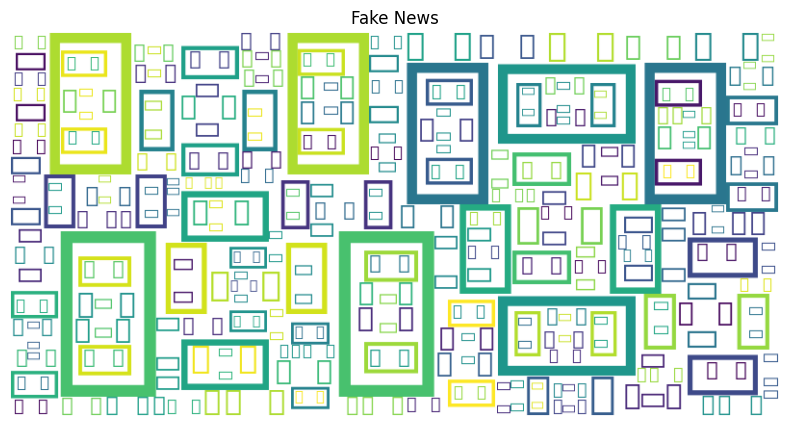

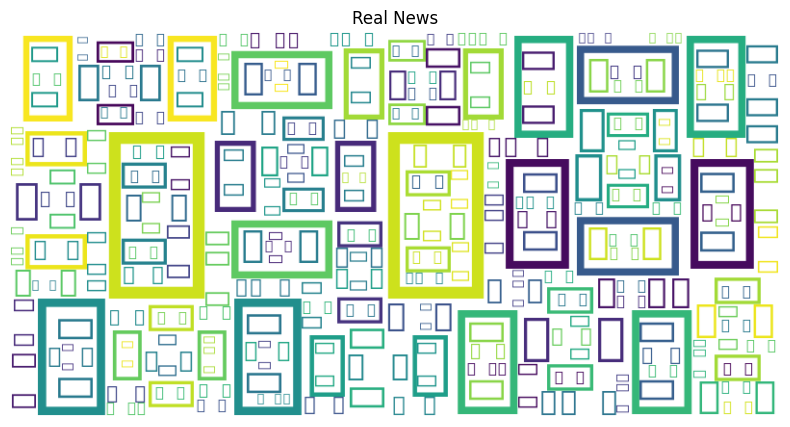

In [11]:
def plot_wordcloud(text, title):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)

fake_text = ' '.join(df_upsampled[df_upsampled.label == 0].text)
real_text = ' '.join(df_upsampled[df_upsampled.label == 1].text)

plot_wordcloud(fake_text, 'Fake News')
plt.show()

print()
print()
print()


plot_wordcloud(real_text, 'Real News')
plt.show()

# **Fix for Bangla WordCloud**

# **Text Processing**

In [12]:
text_colum = 'text'
label_column = 'label'

In [14]:
stopword = set([
    "এবং", "কিন্তু", "অথবা", "যদি", "তবে", "তাহলে", "কেন", "কি", "কোন",
    "যা", "যে", "যখন", "যখনই", "আমার", "আমরা", "আপনি", "তুমি", "তারা",
    "হয়", "ছিল", "থাকবে", "হতে", "করে", "করছে", "করেছে", "নয়", "না"
])
# stopword = set(stopwords.words('bengali'))

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def preprocess_text(text):
  # Remove punctuation
  punctuations = string.punctuation + '।' + '‘' + '’' + '“' + '”'
  text_no_punctuation = text.translate(str.maketrans('', '', punctuations))

  # Remove stopwords
  text_no_stopwords = ' '.join([word for word in text_no_punctuation.split() if word not in stopword])

  return text_no_stopwords

In [17]:
display(df_upsampled.head(10))

,text,label
0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রি...,1
1,টস হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যা...,1
2,রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে মাদক ...,1
3,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,1
4,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...",1
5,আইনগত ভিত্তি পেলেই ইভিএম ব্যবহার: সিইসি ﻿আইনগত...,1
6,রিয়ালের চ্যাম্পিয়নের মতোই শুরু চ্যাম্পিয়ন্স লি...,1
7,ডিজিটাল পাঠ্যবই শিক্ষার্থী ও শিক্ষক উভয়ের জন্য...,1
8,"আমার পক্ষে বিপক্ষে মিডিয়ায় কে কি লিখলো, না লিখ...",1
9,টিম ম্যানেজমেন্টকে বেকায়দায় ফেলে দিলেন লিটন-শা...,1


In [18]:
df_upsampled = df_upsampled.rename(columns={'text_no_stopwords': 'cleaned_text'})
display(df_upsampled.head())

,text,label
0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রি...,1
1,টস হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যা...,1
2,রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে মাদক ...,1
3,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,1
4,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...",1


In [19]:
df_upsampled['cleaned_text'] = df_upsampled['text'].apply(preprocess_text)

In [20]:
df_upsampled['cleaned_text']

,cleaned_text
0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রি...
1,টস হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যা...
2,রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে মাদক ...
3,উস্কানি রোধে নজরদারি সামাজিক যোগাযোগ মাধ্যমে স...
4,যেখানে তেল আসত ৭ দিনে এখন তা আসবে অতি দ্রুত ভা...
...,...
7778,শ্বশুর বাড়ির দেয়া বেগুনিতে বেগুন পেয়ে স্ত্রীকে...
8434,ভালোবাসা দিবসে গোলাপ দেওয়ায় স্ত্রীর হাতে কানমল...
7964,ইমরুল কায়েসকে দলে নিলে বিয়ে করবে কুমিল্লার তান...
7318,বিএনপির শরীরচর্চা কর্মসূচি আসছে দৈনিক মতিকণ্ঠ ...


# **Feature Extraction (TF-IDF)**

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_upsampled['cleaned_text'])
y = df_upsampled['label']

# **Split dataset into training and testing sets**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Evaluation Function**

In [23]:
 def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test,y_pred)
  prob = model.predict_proba(X_test) [:, 1]
  roc_auc = roc_auc_score(y_test, prob)
  fpr, tpr, thresholds = roc_curve(y_test, prob)
  precision, recall, _ = precision_recall_curve(y_test, prob)
  pr_auc = auc(recall, precision)

  return {
      'Accuracy': accuracy,
      'Confusion Matrix': cm,

  }

# **Build Naive Bayes Models**

**Multinomial Naive Bayes**

In [24]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import precision_recall_curve, auc

In [26]:
nb_result = evaluate_model(mnb_model, X_test, y_test)
nb_result

{'Accuracy': 0.9271086428323498,
 'Confusion Matrix': array([[1373,   84],
        [ 126, 1298]])}

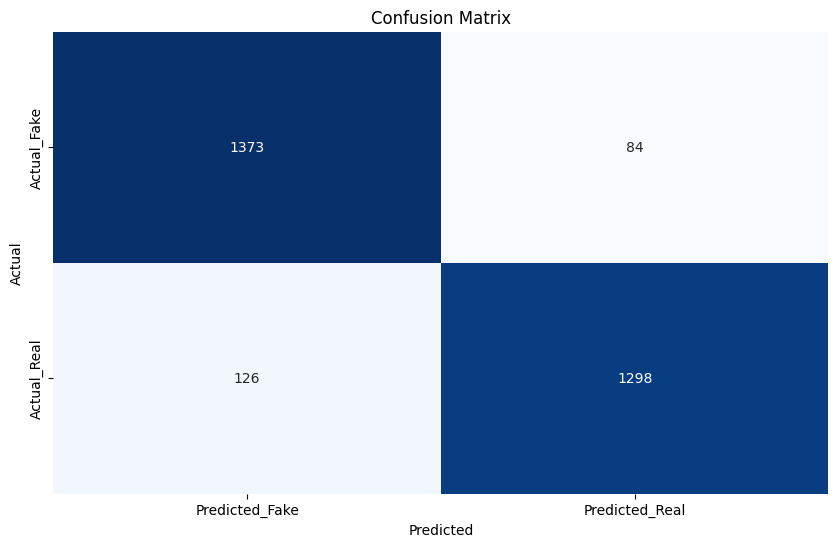

In [27]:
# Create a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(nb_result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted_Fake', 'Predicted_Real'], yticklabels=['Actual_Fake', 'Actual_Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(classification_report(y_test, mnb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1457
           1       0.94      0.91      0.93      1424

    accuracy                           0.93      2881
   macro avg       0.93      0.93      0.93      2881
weighted avg       0.93      0.93      0.93      2881



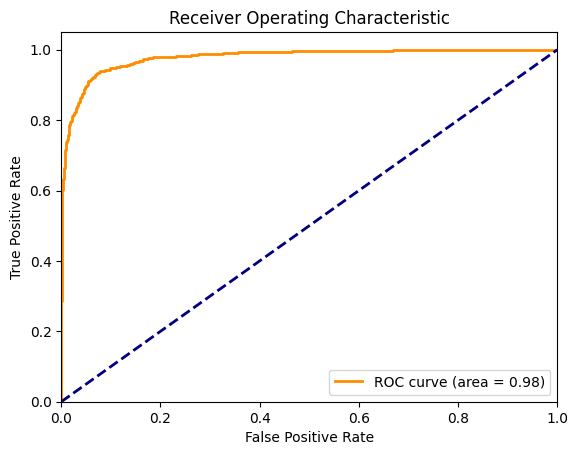

In [29]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = mnb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Bernoulli Naive Bayes**

In [30]:
bnb_model = BernoulliNB(alpha=1.0, fit_prior=True, class_prior=None)
bnb_model.fit(X_train, y_train)

BernoulliNB()

In [31]:
bnb_result = evaluate_model(bnb_model, X_test, y_test)
bnb_result

{'Accuracy': 0.9330093717459216,
 'Confusion Matrix': array([[1360,   97],
        [  96, 1328]])}

In [32]:
cm_bnb = confusion_matrix(y_test, bnb_model.predict(X_test))
cm_bnb

array([[1360,   97],
       [  96, 1328]])

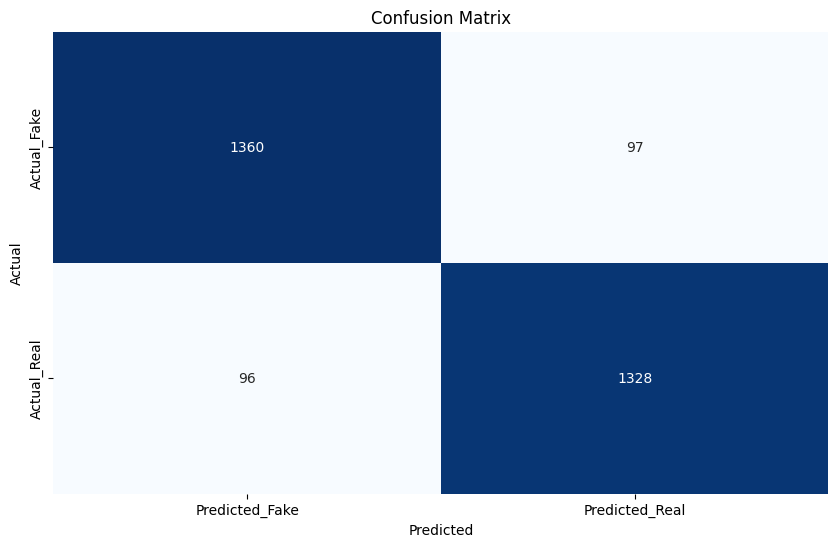

In [33]:
# Create a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted_Fake', 'Predicted_Real'], yticklabels=['Actual_Fake', 'Actual_Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print(classification_report(y_test, bnb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1457
           1       0.93      0.93      0.93      1424

    accuracy                           0.93      2881
   macro avg       0.93      0.93      0.93      2881
weighted avg       0.93      0.93      0.93      2881



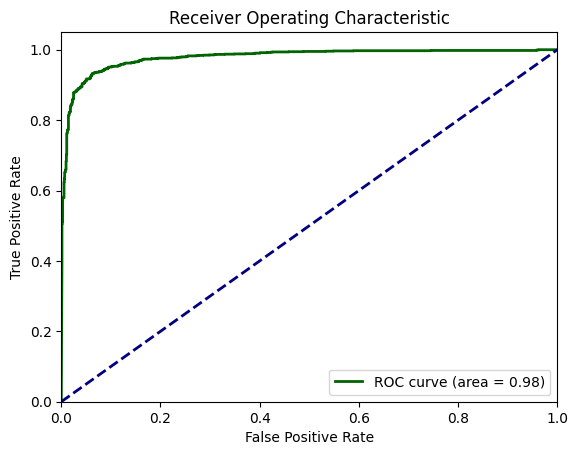

In [35]:
y_pred_proba = bnb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Apply Logistic Regression**

In [36]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
lr_results = evaluate_model(lr_model, X_test, y_test)
lr_results

{'Accuracy': 0.9507115584866366,
 'Confusion Matrix': array([[1409,   48],
        [  94, 1330]])}

In [38]:
cm_lr = confusion_matrix(y_test, lr_model.predict(X_test))
cm_lr

array([[1409,   48],
       [  94, 1330]])

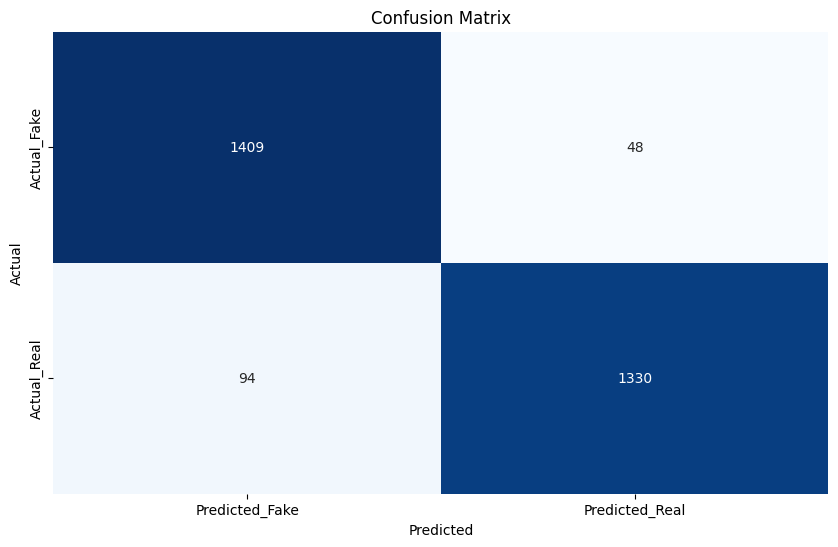

In [39]:
# Create a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted_Fake', 'Predicted_Real'], yticklabels=['Actual_Fake', 'Actual_Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1457
           1       0.97      0.93      0.95      1424

    accuracy                           0.95      2881
   macro avg       0.95      0.95      0.95      2881
weighted avg       0.95      0.95      0.95      2881



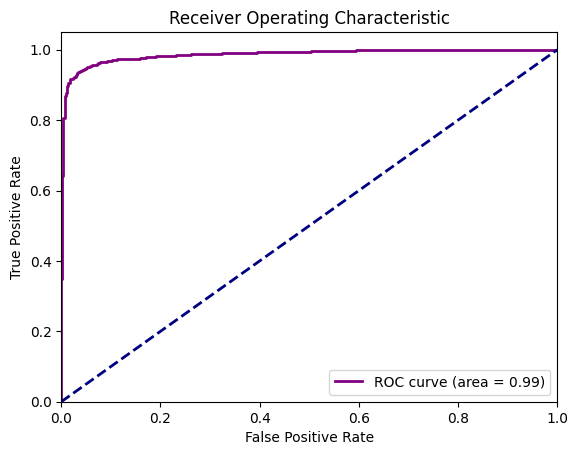

In [41]:
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Compare Model Performance with histogram**

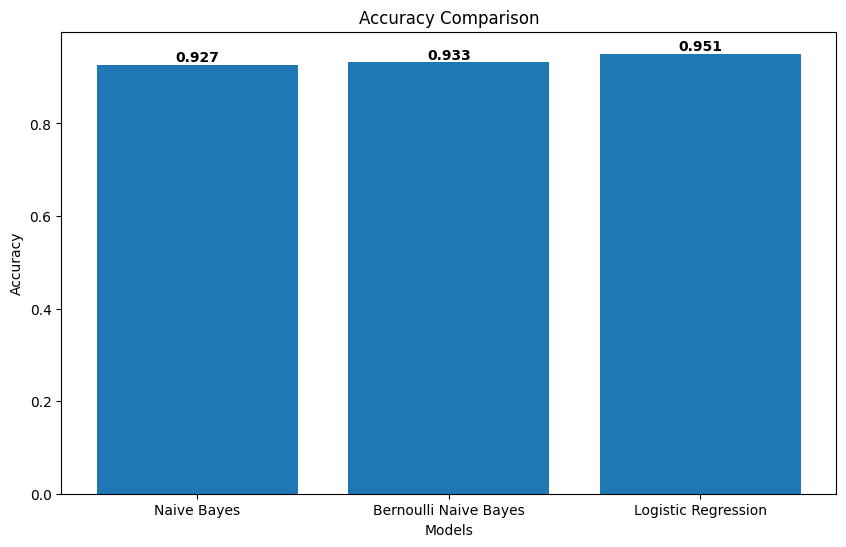

In [42]:
def plot_histogram(metric_values, model_names, metric_name):
  fig, ax = plt.subplots(figsize=(10, 6))
  bars = plt.bar(model_names, metric_values)
  plt.xlabel('Models')
  plt.ylabel(metric_name)
  plt.title(f'{metric_name} Comparison')

  for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')


  plt.show()

accuracy_values = [nb_result['Accuracy'], bnb_result['Accuracy'], lr_results['Accuracy']]
model_names = ['Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
metric_name = 'Accuracy'

plot_histogram(accuracy_values, model_names, metric_name)

# **Input random text and make a predicton**

In [43]:
models = [mnb_model, bnb_model, lr_model]

In [44]:
random_text = input("Enter a text: ")

preprocessed_text = preprocess_text(random_text)
vectorized_text = vectorizer.transform([preprocessed_text])

Enter a text: ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়েক বছরে তাদের পারফরম্যান্স নজর কেড়েছে ক্রিকেট জগতের। এশিয়া কাপের ১৪তম আসরেও দারুণ ছন্দে আছে আফগান ক্রিকেটাররা। পাঁচবারের এশিয়া কাপ চ্যাম্পিয়ন শ্রীলঙ্কাকে হারিয়ে এরই মধ্যে সেরা চারে পৌঁছে গেছে তারা। তবে দলের এমন ভালো সময়ে হঠাৎ করেই পদত্যাগ করেন আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান আতিফ মাশাল। তবে হঠাৎ কী কারণে তার এই পদত্যাগ- এ নিয়ে ওঠা প্রশ্নের জবাব দিয়েছেন আতিফ। তিনি জানান, সরকারের অন্য একটি বিশেষ পদে তাকে নিয়োগ দেওয়ার কারণেই বোর্ডের দায়িত্ব থেকে অব্যাহতি। তার পরিবর্তে এসিবির দায়িত্ব নেবেন আফগান বোর্ডের সাবেক সহ সভাপতি আজিজ উল্লাহ ফজলে।\xa0\xa0 ২০১৭ সালের জানুয়ারিতে পাঁচ বছরের জন্য আতিফকে বোর্ড প্রধান নির্বাচন করা হলেও দায়িত্বের আড়াই বছরের মাথায় দায়িত্ব থেকে অব্যাহতি দিলেন তিনি। বিডি প্রতিদিন/ ওয়াসিফ


In [45]:
for model in models:
  prediction = model.predict(vectorized_text)
  print(f"Prediction using {model.__class__.__name__}: {prediction[0]}")

Prediction using MultinomialNB: 1
Prediction using BernoulliNB: 1
Prediction using LogisticRegression: 1


In [46]:
print("Fake News:\n")
fake['content'][12]

Fake News:



'ঈদ অনুষ্ঠানের সময় বেশি বিজ্ঞাপন না দেওয়ায় টিভি ভাঙলেন ইউনাইটেড স্টেটস অফ মিরপুরের এক বাসিন্দা। জানা যায় শুধু বিজ্ঞাপন দেখার আশাতেই ঈদের অনুষ্ঠান দেখা শুরু করেছিলেন মিরপুরের ঐ ব্যক্তি। এ ব্যাপারে ক্ষিপ্ত সেই ভাইটি আমাদের বেশি বেশি বিজ্ঞাপন দেখানোর শর্তে বলেন “ঈদ অনুষ্ঠানে সারাজীবন ধইরা বেশি বেশি বিজ্ঞাপন দেখে আসছি। বিজ্ঞাপনের ফাঁকে ফাঁকে নাটক সিনেমা দিলে সেইটা মানা যায়। এইবার ঈদে এগুলা কি শুরু করসে এই চ্যানেল গুলা! বিরতিহীন নাটকের নামে প্রহসন। ছোটকাল থেকে গড়ে উঠা অভ্যাস কি এমন হুট করে ছেড়ে দেওয়া যায়? আমি বিজ্ঞাপন দেখার আশায় টিভির সামনে বসছি আর এখন পর্যন্ত কোন বিজ্ঞাপনই দেখলাম না, জিদের চোটে টিভিই ভাইঙ্গা ফেলসি! যা শালা টিভিই দেখুম না। কি একটা আজব ঈদ! মিরপুরে জ্যাম নাই টিভিতে বিজ্ঞাপন নাই। আই মিস মাই চাইল্ডহুড”।এদিকে ঈদ অনুষ্ঠানে বেশি পরিমানে বিজ্ঞাপন থাকার সংস্কৃতিকে ধীরে ধীরে বাংলার মাটি থেকে মুছে ফেলার চক্রান্তকে মিরপুরের ধুলার সাথে মিশিয়ে দিতে ঈদের পরেই দলবল নিয়ে আন্দোলনে নামার ঘোষণা দিয়েছেন আমরা বিজ্ঞাপনের ফ্যান (আবিফ্যা)’র সভাপতি বিজ্ঞ আলী।'

In [ ]:
print("Real News:\n")
real['content'][100]